In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

## Análise do histórico de terceirizados (2010 a 2024)

### Concatenar os arquivos de 2024 para um único dataframe

In [2]:
# Caminho da pasta com os arquivos
pasta_dados = Path("../data")

In [3]:
# Seleciona todos os arquivos que seguem o padrão terceirizados2024*.xlsx
arquivos_2024 = sorted(pasta_dados.glob("terceirizados2024*.xlsx"))

In [4]:
# Lê cada arquivo como string
dfs_2024 = []
for arquivo in arquivos_2024:
    df = pd.read_excel(arquivo, dtype=str)
    dfs_2024.append(df)

In [5]:
# Concatena todos os dataframes
df_2024 = pd.concat(dfs_2024, ignore_index=True)

In [6]:
# Remover duplicatas
df_2024 = df_2024.drop_duplicates()

In [7]:
df_2024.shape

(233344, 23)

### Tratamento dos dados de 2010 a 2024

In [8]:
df_historico = pd.read_csv("../../previsao_contratacao/data/historico_cgu/terceirizados-2010-2023.csv", sep=";", dtype=str, low_memory=False)

In [9]:
df_historico.head()

,id_terc,sg_orgao_sup_tabela_ug,cd_ug_gestora,nm_ug_tabela_ug,sg_ug_gestora,nr_contrato,nr_cnpj,nm_razao_social,nr_cpf,nm_terceirizado,...,nm_unidade_prestacao,vl_mensal_salario,vl_mensal_custo,Num_Mes_Carga,Mes_Carga,Ano_Carga,sg_orgao,nm_orgao,cd_orgao_siafi,cd_orgao_siape
0,1,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.140.291-**,CAMILA FERNANDA ROCHA DE SOUSA,...,CONJUR,502.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000
1,2,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.338.161-**,DEILTON ALVES SANTANA,...,CONJUR,502.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000
2,3,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.532.161-**,GLEIDES MARIA DE SOUSA,...,SRA,940.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000
3,4,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.694.231-**,DINIS ALVES DE OLIVEIRA,...,SRA,940.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000
4,5,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.049.961-**,ELIETE DUARTE,...,SRA,940.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000


In [10]:
df_historico.columns

Index(['id_terc', 'sg_orgao_sup_tabela_ug', 'cd_ug_gestora', 'nm_ug_tabela_ug',
       'sg_ug_gestora', 'nr_contrato', 'nr_cnpj', 'nm_razao_social', 'nr_cpf',
       'nm_terceirizado', 'nm_categoria_profissional', 'nm_escolaridade',
       'nr_jornada', 'nm_unidade_prestacao', 'vl_mensal_salario',
       'vl_mensal_custo', 'Num_Mes_Carga', 'Mes_Carga', 'Ano_Carga',
       'sg_orgao', 'nm_orgao', 'cd_orgao_siafi', 'cd_orgao_siape'],
      dtype='object')

In [11]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890255 entries, 0 to 1890254
Data columns (total 23 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   id_terc                    object
 1   sg_orgao_sup_tabela_ug     object
 2   cd_ug_gestora              object
 3   nm_ug_tabela_ug            object
 4   sg_ug_gestora              object
 5   nr_contrato                object
 6   nr_cnpj                    object
 7   nm_razao_social            object
 8   nr_cpf                     object
 9   nm_terceirizado            object
 10  nm_categoria_profissional  object
 11  nm_escolaridade            object
 12  nr_jornada                 object
 13  nm_unidade_prestacao       object
 14  vl_mensal_salario          object
 15  vl_mensal_custo            object
 16  Num_Mes_Carga              object
 17  Mes_Carga                  object
 18  Ano_Carga                  object
 19  sg_orgao                   object
 20  nm_orgao                

#### Adicionar os dados de 2024 ao df_historico

In [12]:
df_2024.head()

,id_terc,sg_orgao_sup_tabela_ug,cd_ug_gestora,nm_ug_tabela_ug,sg_ug_gestora,nr_contrato,nr_cnpj,nm_razao_social,nr_cpf,nm_terceirizado,...,nm_unidade_prestacao,vl_mensal_salario,vl_mensal_custo,Num_Mes_Carga,Mes_Carga,Ano_Carga,sg_orgao,nm_orgao,cd_orgao_siafi,cd_orgao_siape
0,8679421,MAPA,130005,COORDENACAO GERAL DE LOGISTICA INSTITUCIONAL,CGOEF/DA/SE/MAPA,2023-10-01 00:00:00,3325436000149,ADTEL FACILITIES LTDA,***.608.651-**,ALEXANDRO FABRICIO GOMES,...,CGLI,2238,5646,1,JANEIRO,2024,MIN.AGRICULTURA,"MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",22000,13000
1,8679422,MAPA,130005,COORDENACAO GERAL DE LOGISTICA INSTITUCIONAL,CGOEF/DA/SE/MAPA,2023-10-01 00:00:00,3325436000149,ADTEL FACILITIES LTDA,***.831.631-**,ADIELSON LOPES DE MELO,...,CGLI,1516,4536,1,JANEIRO,2024,MIN.AGRICULTURA,"MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",22000,13000
2,8679423,MAPA,130005,COORDENACAO GERAL DE LOGISTICA INSTITUCIONAL,CGOEF/DA/SE/MAPA,2023-10-01 00:00:00,6926324000131,ADTEL FACILITIES LTDA,***.316.751-**,THIAGO ROCHA OLIVEIRA,...,CGLI,1516,4536,1,JANEIRO,2024,MIN.AGRICULTURA,"MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",22000,13000
3,8679424,MAPA,130005,COORDENACAO GERAL DE LOGISTICA INSTITUCIONAL,CGOEF/DA/SE/MAPA,2023-10-01 00:00:00,6926324000131,ADTEL FACILITIES LTDA,***.957.551-**,MARIO CARDOSO DIAS,...,CGLI,1516,4536,1,JANEIRO,2024,MIN.AGRICULTURA,"MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",22000,13000
4,8679425,MAPA,130005,COORDENACAO GERAL DE LOGISTICA INSTITUCIONAL,CGOEF/DA/SE/MAPA,2023-10-01 00:00:00,6926324000131,ADTEL FACILITIES LTDA,***.458.031-**,CLEISON FARIAS VIEIRA,...,CGLI,7623,10695,1,JANEIRO,2024,MIN.AGRICULTURA,"MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",22000,13000


In [13]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233344 entries, 0 to 233343
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   id_terc                    233344 non-null  object
 1   sg_orgao_sup_tabela_ug     233344 non-null  object
 2   cd_ug_gestora              233344 non-null  object
 3   nm_ug_tabela_ug            233344 non-null  object
 4   sg_ug_gestora              226944 non-null  object
 5   nr_contrato                233159 non-null  object
 6   nr_cnpj                    233344 non-null  object
 7   nm_razao_social            233344 non-null  object
 8   nr_cpf                     233344 non-null  object
 9   nm_terceirizado            233335 non-null  object
 10  nm_categoria_profissional  232035 non-null  object
 11  nm_escolaridade            233344 non-null  object
 12  nr_jornada                 233344 non-null  object
 13  nm_unidade_prestacao       233197 non-null  

In [14]:
df_historico_atualizado = pd.concat([df_historico, df_2024], ignore_index=True)

In [16]:
df_historico_atualizado = df_historico_atualizado.drop_duplicates()

In [17]:
df_historico_atualizado.shape

(2123599, 23)

#### Verificar os valores nulos

In [18]:
df_historico_atualizado.isna().sum()

id_terc                          0
sg_orgao_sup_tabela_ug           0
cd_ug_gestora                    0
nm_ug_tabela_ug                  0
sg_ug_gestora                 9654
nr_contrato                   1604
nr_cnpj                       5304
nm_razao_social                146
nr_cpf                           0
nm_terceirizado                 49
nm_categoria_profissional     9450
nm_escolaridade                  0
nr_jornada                       1
nm_unidade_prestacao         57351
vl_mensal_salario               82
vl_mensal_custo                538
Num_Mes_Carga                    1
Mes_Carga                        1
Ano_Carga                        1
sg_orgao                      1551
nm_orgao                      1551
cd_orgao_siafi                2543
cd_orgao_siape                1551
dtype: int64

Para manter um padrão nas análises, vamos retirar os nulos de colunas que nos interessam, como: nr_cnpj e nm_categoria_profissional. Vamos retirar primeiro os nulos de nm_categoria_profissional e verificar os nulos nas outras colunas, verificar se é interessante retirar (ou se ainda tem nulos) e assim sucessivamente. Temos mais 2kk de linhas, então retirar 9450 de nm_categoria_profissional não irá impactar na análise.

In [19]:
df_historico_atualizado = df_historico_atualizado.dropna(subset=['nm_categoria_profissional'])

In [20]:
df_historico_atualizado.isna().sum()

id_terc                          0
sg_orgao_sup_tabela_ug           0
cd_ug_gestora                    0
nm_ug_tabela_ug                  0
sg_ug_gestora                 9654
nr_contrato                   1604
nr_cnpj                       5304
nm_razao_social                146
nr_cpf                           0
nm_terceirizado                 49
nm_categoria_profissional        0
nm_escolaridade                  0
nr_jornada                       1
nm_unidade_prestacao         57340
vl_mensal_salario               82
vl_mensal_custo                538
Num_Mes_Carga                    1
Mes_Carga                        1
Ano_Carga                        1
sg_orgao                      1551
nm_orgao                      1551
cd_orgao_siafi                2543
cd_orgao_siape                1551
dtype: int64

A coluna nr_cnpj possui valores nulos e é uma coluna importante para análise, por isso vamos retirar os nulos dessa linha também.

In [21]:
df_historico_atualizado = df_historico_atualizado.dropna(subset=['nr_cnpj'])

In [22]:
df_historico_atualizado.isna().sum()

id_terc                          0
sg_orgao_sup_tabela_ug           0
cd_ug_gestora                    0
nm_ug_tabela_ug                  0
sg_ug_gestora                 9593
nr_contrato                   1604
nr_cnpj                          0
nm_razao_social                  0
nr_cpf                           0
nm_terceirizado                 49
nm_categoria_profissional        0
nm_escolaridade                  0
nr_jornada                       1
nm_unidade_prestacao         55852
vl_mensal_salario               80
vl_mensal_custo                536
Num_Mes_Carga                    1
Mes_Carga                        1
Ano_Carga                        1
sg_orgao                      1491
nm_orgao                      1491
cd_orgao_siafi                2483
cd_orgao_siape                1491
dtype: int64

Há outras três colunas importantes para as análises: vl_mensal_salario, vl_mensal_custo e Ano_Carga. As duas primeiras vão nos permitir identificar padrões salariais de cada categoria profissional e também o custo de cada posto par as empresas. No caso de Ano_Carga será importante para identificar padrões ao longo dos anos. Por isso será importante retirar os nulos que aparecem nessas colunas.

In [24]:
df_historico_atualizado = df_historico_atualizado.dropna(subset=['vl_mensal_salario', 'vl_mensal_custo', 'Ano_Carga'])

In [25]:
df_historico_atualizado.isna().sum()

id_terc                          0
sg_orgao_sup_tabela_ug           0
cd_ug_gestora                    0
nm_ug_tabela_ug                  0
sg_ug_gestora                 9573
nr_contrato                   1604
nr_cnpj                          0
nm_razao_social                  0
nr_cpf                           0
nm_terceirizado                 49
nm_categoria_profissional        0
nm_escolaridade                  0
nr_jornada                       0
nm_unidade_prestacao         55851
vl_mensal_salario                0
vl_mensal_custo                  0
Num_Mes_Carga                    0
Mes_Carga                        0
Ano_Carga                        0
sg_orgao                      1490
nm_orgao                      1490
cd_orgao_siafi                2482
cd_orgao_siape                1490
dtype: int64

### Transformar os dados para as análises

In [26]:
df_historico_atualizado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108309 entries, 0 to 2123598
Data columns (total 23 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   id_terc                    object
 1   sg_orgao_sup_tabela_ug     object
 2   cd_ug_gestora              object
 3   nm_ug_tabela_ug            object
 4   sg_ug_gestora              object
 5   nr_contrato                object
 6   nr_cnpj                    object
 7   nm_razao_social            object
 8   nr_cpf                     object
 9   nm_terceirizado            object
 10  nm_categoria_profissional  object
 11  nm_escolaridade            object
 12  nr_jornada                 object
 13  nm_unidade_prestacao       object
 14  vl_mensal_salario          object
 15  vl_mensal_custo            object
 16  Num_Mes_Carga              object
 17  Mes_Carga                  object
 18  Ano_Carga                  object
 19  sg_orgao                   object
 20  nm_orgao                

Os dados estão como tipo object, precisamos transformá-los para fazerem sentido nas análises.

In [30]:
# Força conversão para número, valores inválidos viram NaN
df_historico_atualizado['nr_jornada'] = pd.to_numeric(df_historico_atualizado['nr_jornada'], errors='coerce')
df_historico_atualizado['Ano_Carga'] = pd.to_numeric(df_historico_atualizado['Ano_Carga'], errors='coerce')

# Remove linhas com NaN nas colunas
df_historico_atualizado = df_historico_atualizado.dropna(subset=['nr_jornada', 'Ano_Carga'])

# Converte para inteiro
df_historico_atualizado['nr_jornada'] = df_historico_atualizado['nr_jornada'].astype(int)
df_historico_atualizado['Ano_Carga'] = df_historico_atualizado['Ano_Carga'].astype(int)

In [31]:
# Converte para float com duas casas decimais
df_historico_atualizado['vl_mensal_salario'] = df_historico_atualizado['vl_mensal_salario'].astype(float).round(2)
df_historico_atualizado['vl_mensal_custo'] = df_historico_atualizado['vl_mensal_custo'].astype(float).round(2)

### Quantidade de terceirizados por ano de carga na CGU

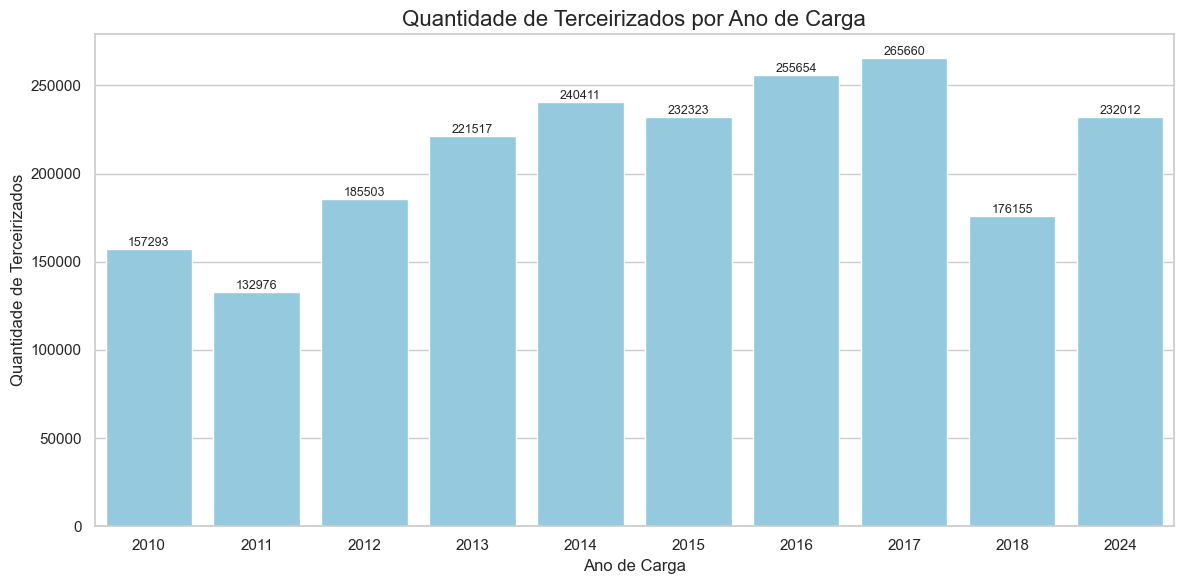

In [36]:
# Estilo bonito
sns.set(style="whitegrid")

# Contagem de terceirizados por ano
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_historico_atualizado, x="Ano_Carga", color='skyblue')

# Títulos e rótulos
ax.set_title("Quantidade de Terceirizados por Ano de Carga", fontsize=16)
ax.set_xlabel("Ano de Carga", fontsize=12)
ax.set_ylabel("Quantidade de Terceirizados", fontsize=12)

# Adiciona os valores no topo das barras, como inteiros
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)
    
# Caminho e nome do arquivo
#plt.savefig("./graficos/quantidade_terceirizados_por_ano.png", dpi=300)  # Salva em alta resolução

plt.tight_layout()
plt.show()